   Age  Income (₹)  Debt (₹)  Credit Utilization (%)  \
0   56      678892    317898               44.032342   
1   46      305287    193510               61.529803   
2   32     1357088    109847                8.346408   
3   60      956702    422587               88.241637   
4   25     1457448    444717               80.360354   

   Payment History (months)  Number of Credit Accounts  Loan Amount (₹)  \
0                        19                          7            66985   
1                        14                          4           655032   
2                         0                          9           776001   
3                        13                          1           975112   
4                         4                          7           483178   

   Default  
0        0  
1        1  
2        0  
3        0  
4        0  
Age                          0
Income (₹)                   0
Debt (₹)                     0
Credit Utilization (%)       0
Payment Hi

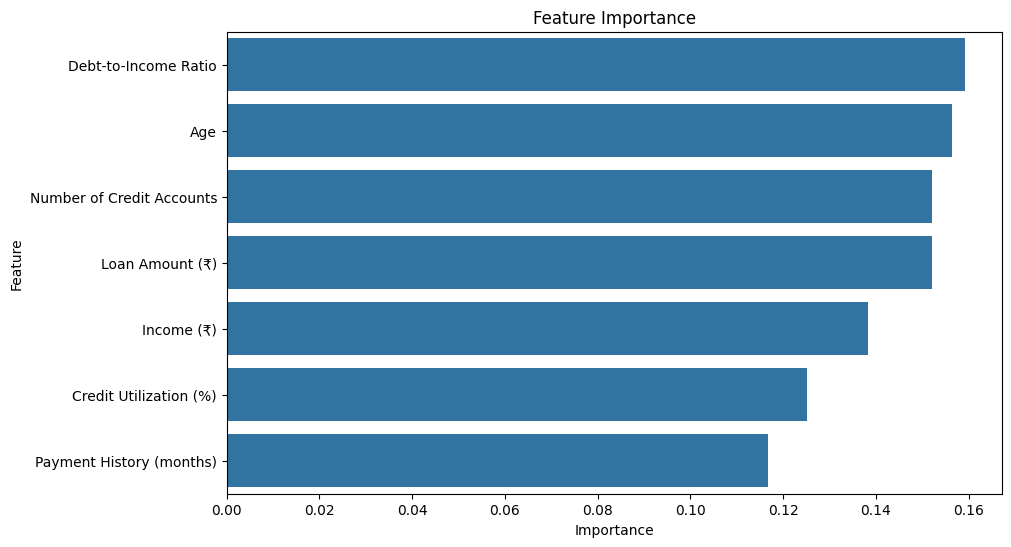

['credit_score_model.pkl']

In [5]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

data = {
    'Age': np.random.randint(18, 65, num_samples),
    'Income (₹)': np.random.randint(300000, 1500000, num_samples),  # Annual income in ₹
    'Debt (₹)': np.random.randint(0, 500000, num_samples),         # Total debt in ₹
    'Credit Utilization (%)': np.random.uniform(0, 100, num_samples),  # Credit utilization percentage
    'Payment History (months)': np.random.randint(0, 24, num_samples),  # Months of on-time payments
    'Number of Credit Accounts': np.random.randint(1, 10, num_samples),
    'Loan Amount (₹)': np.random.randint(0, 1000000, num_samples),  # Loan amount in ₹
    'Default': np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # Target: 0 = Good, 1 = Default
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle outliers (e.g., cap income at 99th percentile)
df['Income (₹)'] = np.where(df['Income (₹)'] > df['Income (₹)'].quantile(0.99), df['Income (₹)'].quantile(0.99), df['Income (₹)'])

# Feature Engineering: Create Debt-to-Income Ratio
df['Debt-to-Income Ratio'] = df['Debt (₹)'] / df['Income (₹)']

# Drop unnecessary columns (if any)
df = df.drop(columns=['Debt (₹)'])

# Display the cleaned data
print(df.head())

from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['Default'])
y = df['Default']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize the model
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

import joblib

# Save the model
joblib.dump(model, 'credit_score_model.pkl')
